In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, accuracy_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Step 1: Creating the dataset

In [30]:
np.random.seed(0)

# Constants for the quadratic equation
a, b, c = 1, 2, 3

# Create a DataFrame with a single feature
n = 500  # number of data points
x = np.linspace(-10, 10, n)  # feature values from -10 to 10
noise = np.random.normal(0, 10, n)  # some random noise
y = a * x**2 + b * x + c + noise  # quadratic equation with noise

data = pd.DataFrame({'X': x, 'y': y})
data["X"] = data["X"].round(3)
data["y"] = data["y"].round(3)

In [31]:
data.head(5)

,X,y
0,-10.00,100.641
1,-9.96,86.282
2,-9.92,91.351
3,-9.88,103.259
4,-9.84,98.816


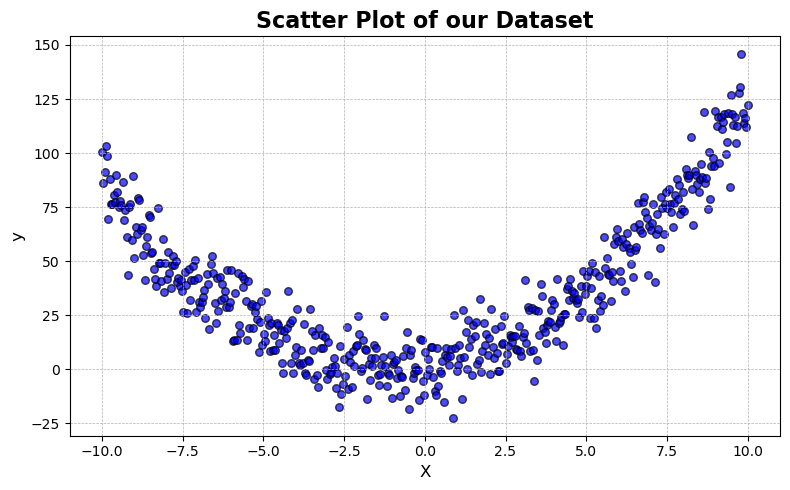

In [32]:
fig, ax = plt.subplots(figsize=(8, 5)) 

ax.scatter(x=data["X"], y=data["y"], color='blue', marker='o', edgecolor='black', s=30, alpha=0.7)  

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Scatter Plot of our Dataset', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.tight_layout()
plt.show()

### Step 2: Train-test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[["X"]], 
                        data["y"], test_size=0.2, random_state=0)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(f"Shape of Training DF: {train_df.shape}")
print(f"Shape of Test DF:     {test_df.shape}")

Shape of Training DF: (400, 2)
Shape of Test DF:     (100, 2)


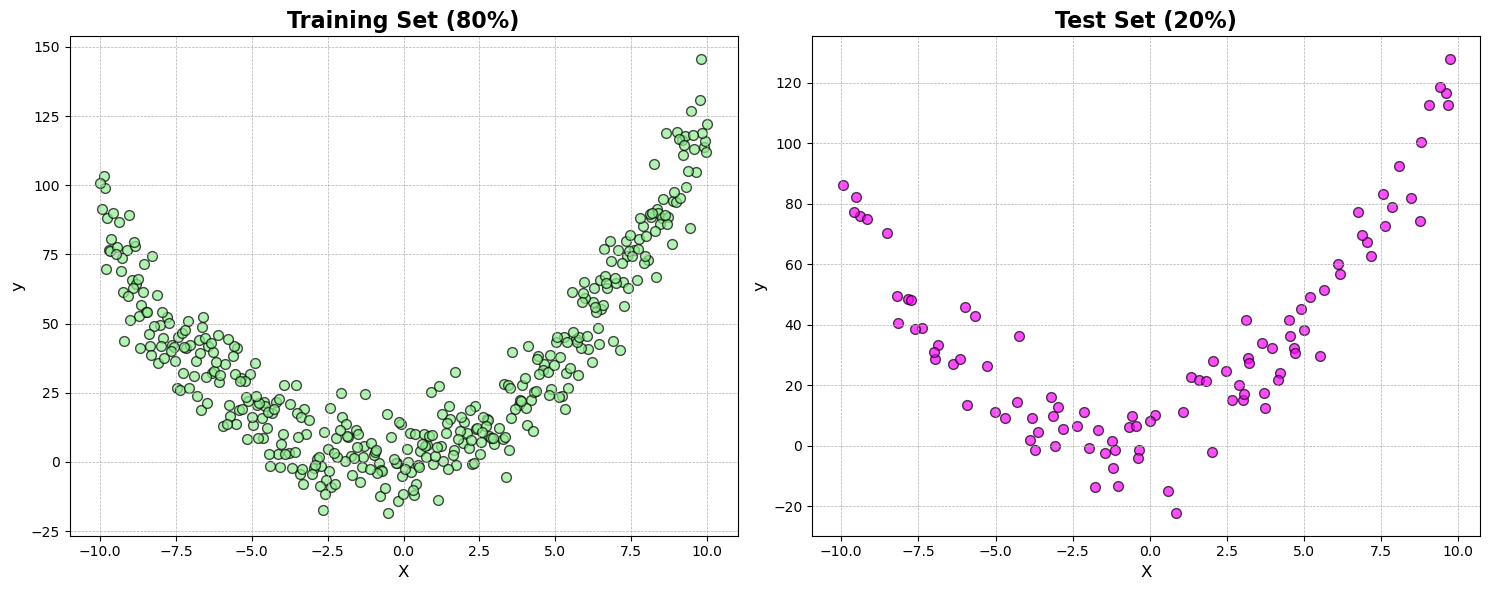

In [34]:
# Plotting train and test sets

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) 

ax1.scatter(train_df["X"], train_df["y"], color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_title('Training Set (80%)', fontsize=16, fontweight='bold')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)

# Plotting the testing data on ax2
ax2.scatter(test_df["X"], test_df["y"], color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_title('Test Set (20%)', fontsize=16, fontweight='bold')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('y', fontsize=12)

plt.tight_layout()
plt.show()

### Step 3: Fitting the regression tree on the training set

In [35]:
# Fit the regression tree
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Step 4: Evaluating the regression tree on training and test sets

In [36]:
# Predict for training data and compute mean squared error
train_yhat = regressor.predict(X_train)
train_mse = root_mean_squared_error(y_train, train_yhat)

# Predict for test data and compute mean squared error
test_yhat = regressor.predict(X_test)
test_mse = root_mean_squared_error(y_test, test_yhat)

print(f"MSE on training set: {np.round(train_mse, 3)}")
print(f"MSE on test set:     {np.round(test_mse, 3)}")

MSE on training set: 0.0
MSE on test set:     13.166


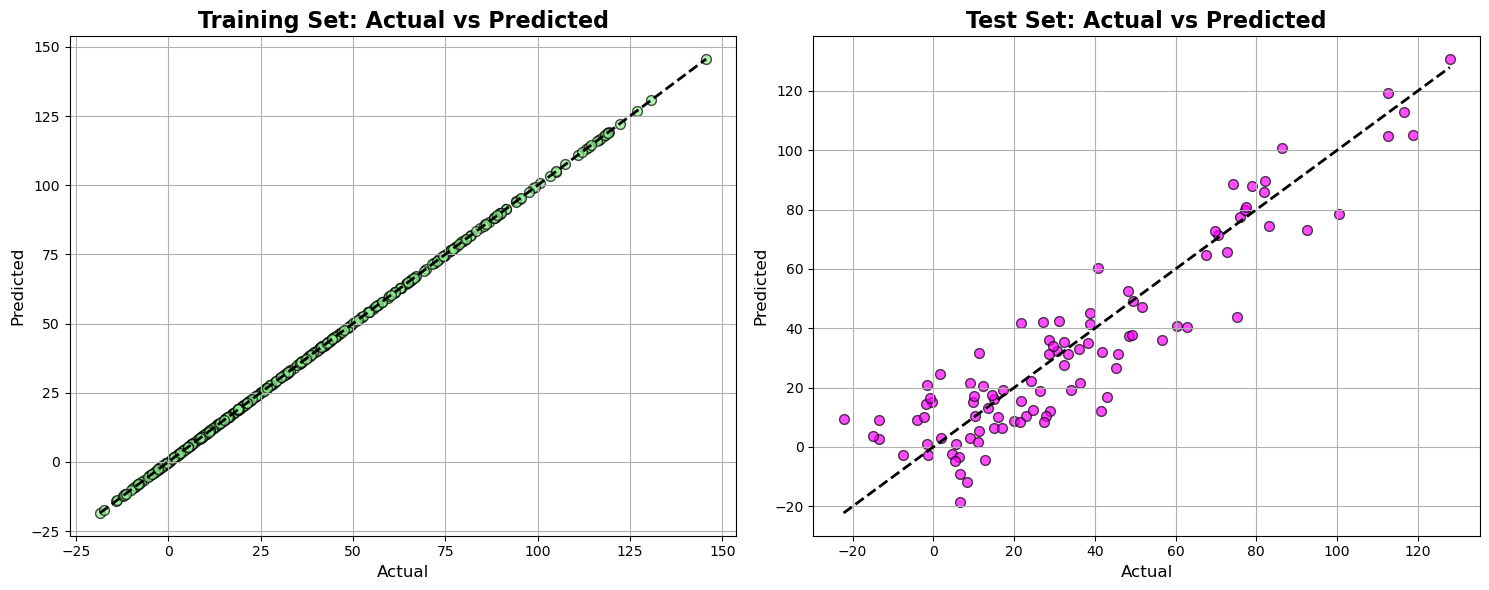

In [37]:
# Plotting the predictions
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting actual vs predicted for training set on ax1
ax1.scatter(y_train, train_yhat, color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax1.set_title('Training Set: Actual vs Predicted', fontsize=16, fontweight='bold')
ax1.set_xlabel('Actual', fontsize=12)
ax1.set_ylabel('Predicted', fontsize=12)
ax1.grid(True)

# Plotting actual vs predicted for testing set on ax2
ax2.scatter(y_test, test_yhat, color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax2.set_title('Test Set: Actual vs Predicted', fontsize=16, fontweight='bold')
ax2.set_xlabel('Actual', fontsize=12)
ax2.set_ylabel('Predicted', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

In [38]:
def plot_regressor(regressor):

    depth = regressor.max_depth

    # Predicting over the entire range of X
    x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    y_range_pred = regressor.predict(x_range)

    # Plotting the decision boundaries
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting the actual data
    ax.scatter(X_train, y_train, color='lightgreen', marker='o', edgecolor='black', label='Training data')
    ax.scatter(X_test, y_test, color='magenta', marker='o', edgecolor='black', label='Test data')

    # Plotting the predicted values and decision boundaries
    ax.plot(x_range, y_range_pred, color='red', label='Predictions')
    # for split in regressor.tree_.threshold[regressor.tree_.feature != -2]:
    #     plt.axvline(x=split, color='gray', linestyle='--')

    ax.set_title(f'Decision Tree (Max Depth = {depth})', fontsize=16, fontweight='bold')
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

/home/apolo/anaconda3/envs/itau/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


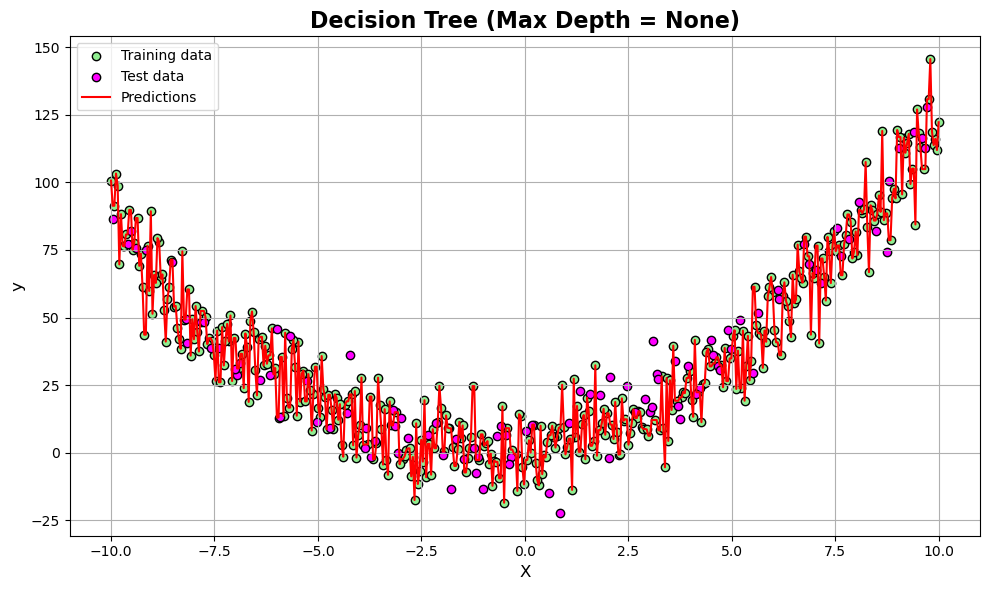

In [39]:
plot_regressor(regressor)

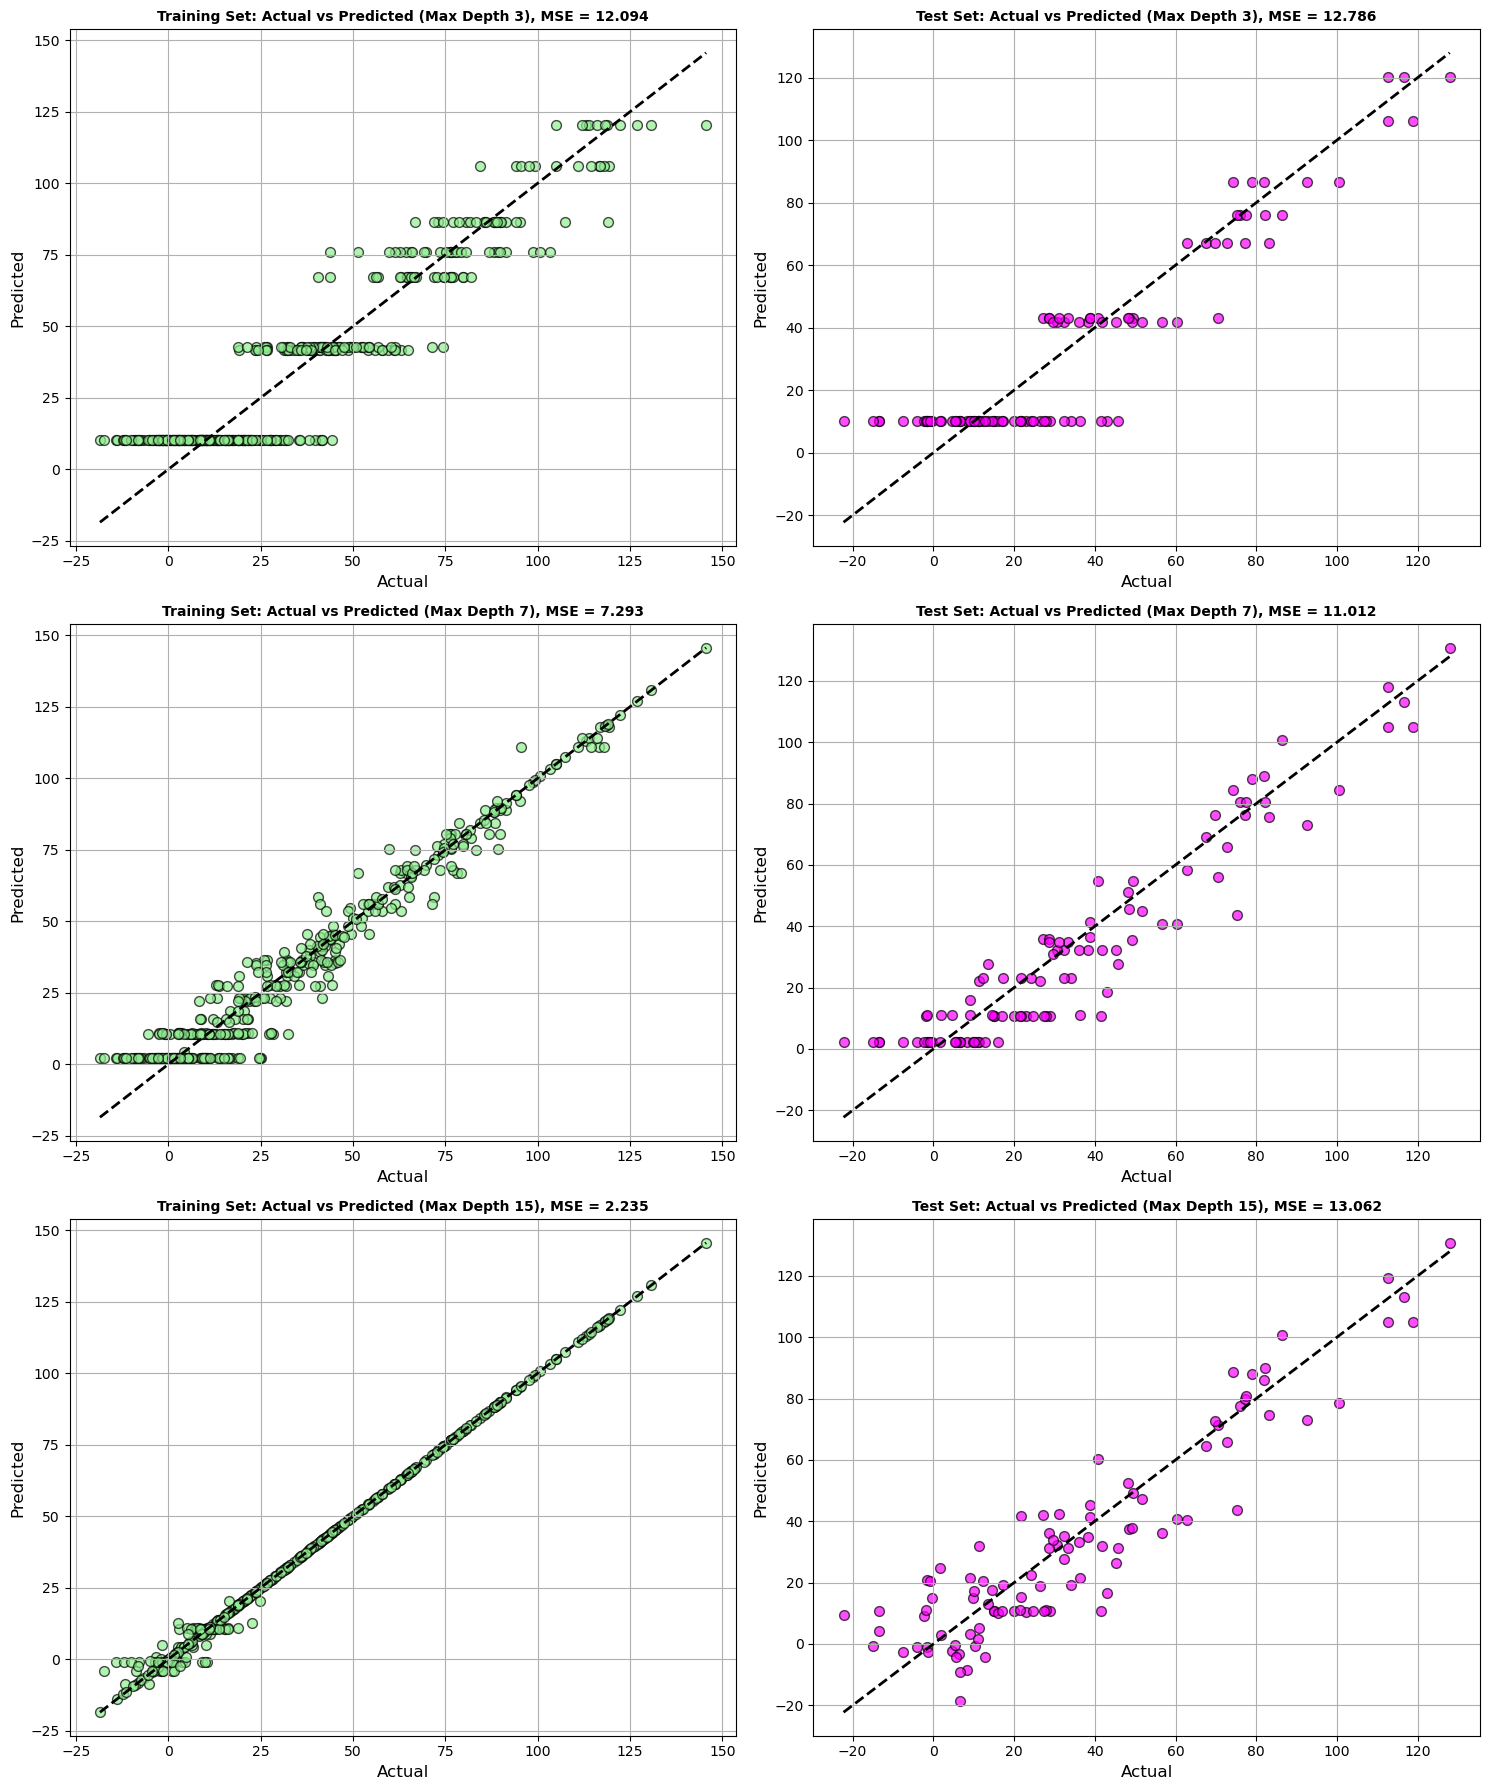

In [41]:
max_depth_vals = [3, 7, 15]

# Creating a figure with subplots for each max_depth value
fig, axs = plt.subplots(nrows=len(max_depth_vals), ncols=2, figsize=(15, 6 * len(max_depth_vals)))

for i, max_depth in enumerate(max_depth_vals):
    # Fit the regression tree for each max_depth value
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(X_train, y_train)

    # Predict for training data and compute mean squared error
    train_yhat = regressor.predict(X_train)
    train_mse = root_mean_squared_error(y_train, train_yhat)

    # Predict for test data and compute mean squared error
    test_yhat = regressor.predict(X_test)
    test_mse = root_mean_squared_error(y_test, test_yhat)

    # print(f"Max Depth: {max_depth}, MSE on training set: {np.round(train_mse, 3)}, MSE on test set: {np.round(test_mse, 3)}")

    # Plotting actual vs predicted for training set
    axs[i, 0].scatter(y_train, train_yhat, color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
    axs[i, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Line for perfect predictions
    axs[i, 0].set_title(f'Training Set: Actual vs Predicted (Max Depth {max_depth}), MSE = {np.round(train_mse, 3)}', fontsize=10, fontweight='bold')
    axs[i, 0].set_xlabel('Actual', fontsize=12)
    axs[i, 0].set_ylabel('Predicted', fontsize=12)
    axs[i, 0].grid(True)

    # Plotting actual vs predicted for testing set
    axs[i, 1].scatter(y_test, test_yhat, color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect predictions
    axs[i, 1].set_title(f'Test Set: Actual vs Predicted (Max Depth {max_depth}), MSE = {np.round(test_mse, 3)}', fontsize=10, fontweight='bold')
    axs[i, 1].set_xlabel('Actual', fontsize=12)
    axs[i, 1].set_ylabel('Predicted', fontsize=12)
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

/home/apolo/anaconda3/envs/itau/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


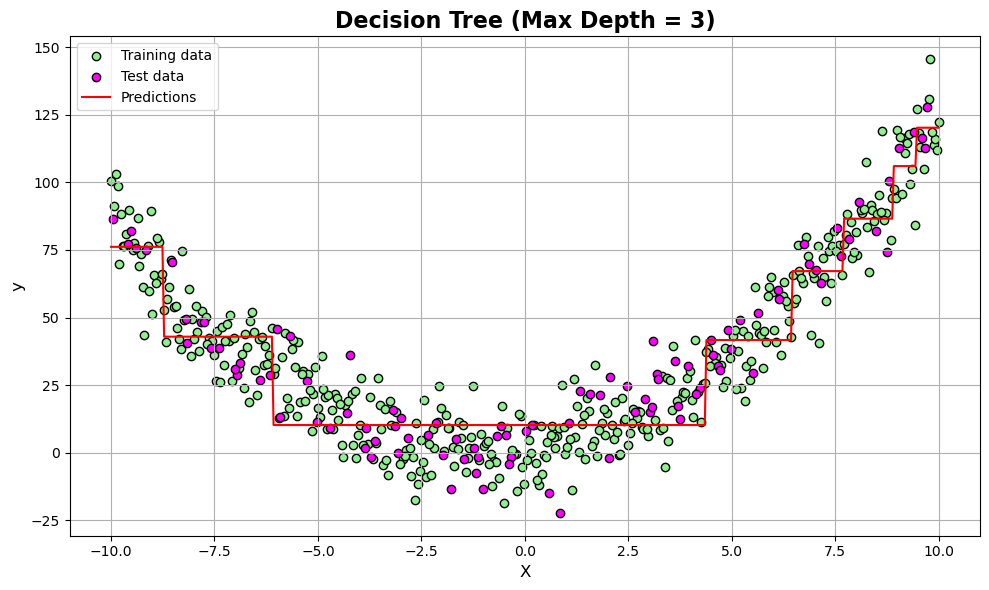

/home/apolo/anaconda3/envs/itau/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


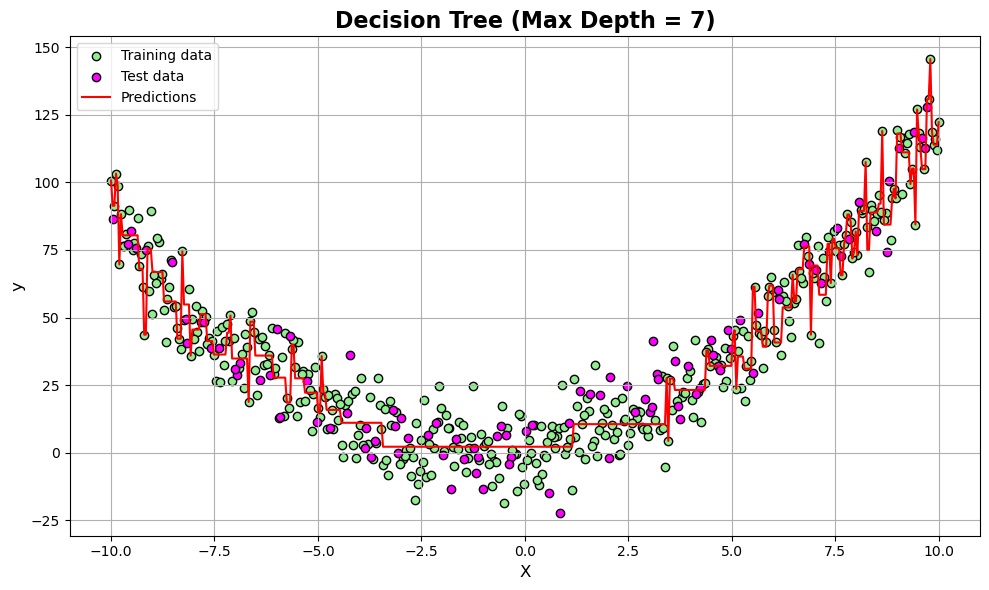

/home/apolo/anaconda3/envs/itau/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


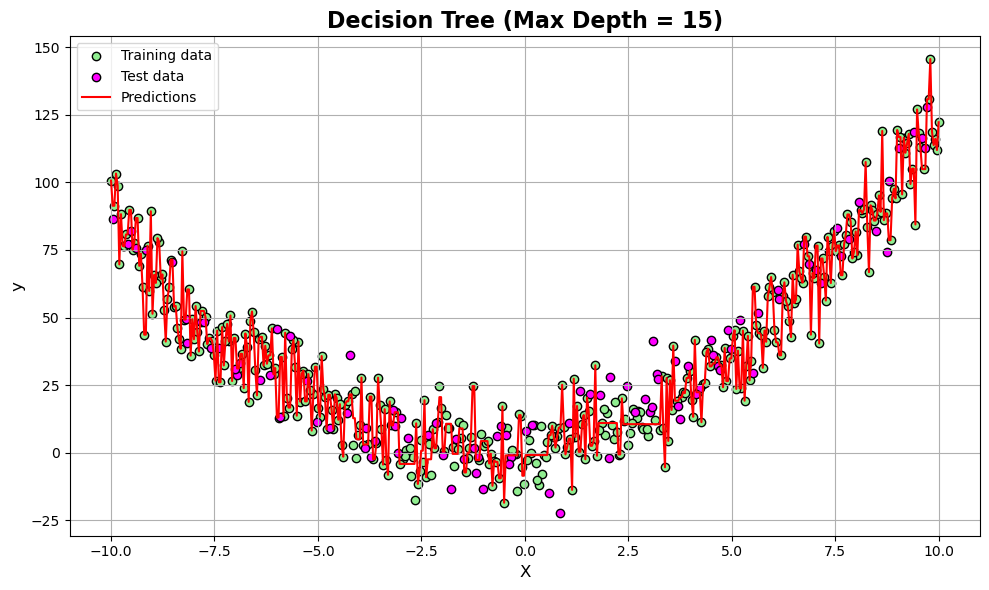

In [42]:
for depth in max_depth_vals:
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(X_train, y_train)
    plot_regressor(regressor)

## Step 5: Implement bagging in scikit-learn

In [44]:
bag_regressor = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=200,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)

bag_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=100,
                 n_estimators=200, n_jobs=-1)

In [45]:
adaboost_regressor = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=200,
)

adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=200)

### Step 6: Evaluate the bagged version of the decision tree regressor

In [53]:
# Predict for training data and compute mean squared error
bag_train_yhat = bag_regressor.predict(X_train)
bag_train_mse = root_mean_squared_error(y_train, bag_train_yhat)

# Predict for test data and compute mean squared error
bag_test_yhat = bag_regressor.predict(X_test)
bag_test_mse = root_mean_squared_error(y_test, bag_test_yhat)

print(f"MSE on training set: {np.round(bag_train_mse, 3)}")
print(f"MSE on test set:     {np.round(bag_test_mse, 3)}")

MSE on training set: 8.333
MSE on test set:     10.125


In [54]:
# Predict for training data and compute mean squared error
ada_train_yhat = adaboost_regressor.predict(X_train)
ada_train_mse = root_mean_squared_error(y_train, ada_train_yhat)

# Predict for test data and compute mean squared error
ada_test_yhat = adaboost_regressor.predict(X_test)
ada_test_mse = root_mean_squared_error(y_test, ada_test_yhat)

print(f"MSE on training set: {np.round(ada_train_mse, 3)}")
print(f"MSE on test set:     {np.round(ada_test_mse, 3)}")

MSE on training set: 1.667
MSE on test set:     13.981


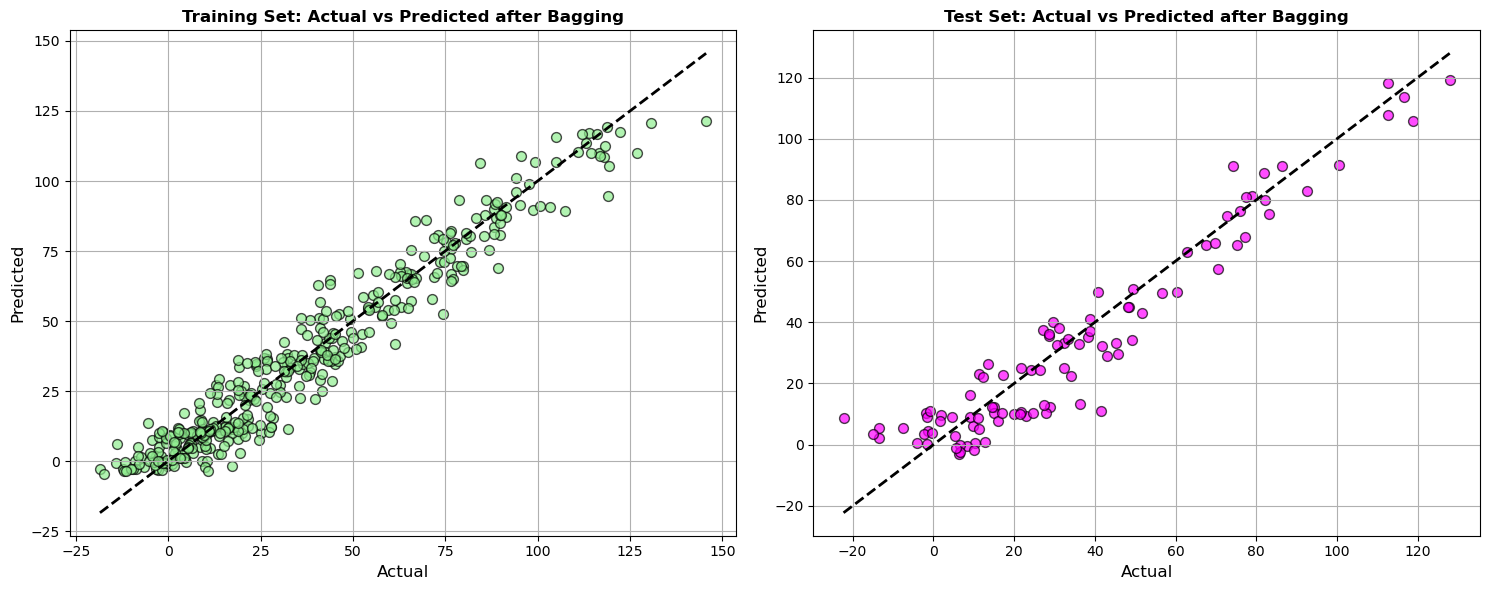

In [57]:
train_yhat = bag_train_yhat
test_yhat = bag_test_yhat
# train_yhat = ada_train_yhat
# test_yhat = ada_test_yhat

# Plotting the predictions
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting actual vs predicted for training set on ax1
ax1.scatter(y_train, train_yhat, color='lightgreen', marker='o', edgecolor='black', s=50, alpha=0.7)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax1.set_title('Training Set: Actual vs Predicted after Bagging', fontsize=12, fontweight='bold')
ax1.set_xlabel('Actual', fontsize=12)
ax1.set_ylabel('Predicted', fontsize=12)
ax1.grid(True)

# Plotting actual vs predicted for testing set on ax2
ax2.scatter(y_test, test_yhat, color='magenta', marker='o', edgecolor='black', s=50, alpha=0.7)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Adding a line for perfect predictions
ax2.set_title('Test Set: Actual vs Predicted after Bagging', fontsize=12, fontweight='bold')
ax2.set_xlabel('Actual', fontsize=12)
ax2.set_ylabel('Predicted', fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()

/home/apolo/anaconda3/envs/itau/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


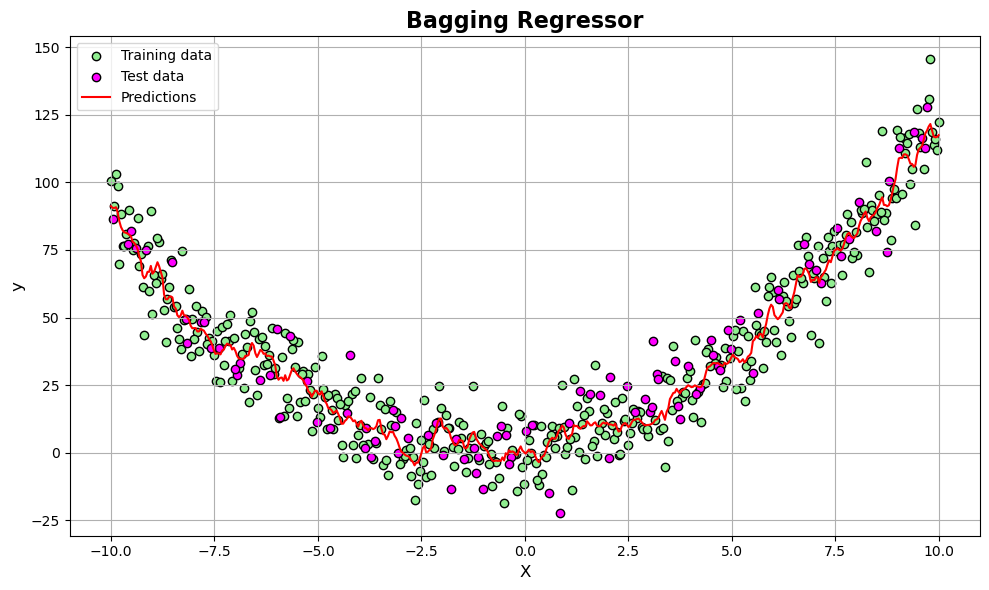

In [60]:
model = bag_regressor # bag_regressor / adaboost_regressor

# Predicting over the entire range of X
x_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
y_range_pred = model.predict(x_range)

# Plotting the decision boundaries
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the actual data
ax.scatter(X_train, y_train, color='lightgreen', marker='o', edgecolor='black', label='Training data')
ax.scatter(X_test, y_test, color='magenta', marker='o', edgecolor='black', label='Test data')

# Plotting the predicted values and decision boundaries
ax.plot(x_range, y_range_pred, color='red', label='Predictions')

ax.set_title(f'Bagging Regressor', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# Medium 2

### Step 1: Generating the dataset

In [26]:
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

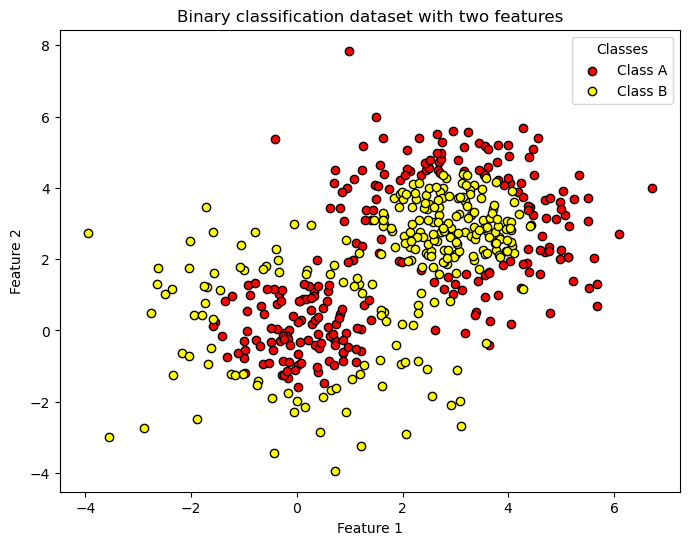

In [27]:
colors = ['red', 'yellow']
feature_names = ['Feature 1', 'Feature 2']
class_names = ['Class A', 'Class B']

# Plotting the original dataset with original class names
plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=class_names[i], edgecolor='k')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Binary classification dataset with two features")
plt.legend(title="Classes")
plt.show()

### Step 2: Train-test split

In [23]:
# 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(f"Size of training set is {X_train.shape[0]}")
print(f"Size of test set is {X_test.shape[0]}")

Size of training set is 400
Size of test set is 100


### Step 3: Fit the AdaBoostClassifier from Scikit-Learn.

In [24]:
weak_learner = DecisionTreeClassifier(max_depth=1)

clf = AdaBoostClassifier(
    estimator=weak_learner, 
    n_estimators=100, 
    random_state=42
)
clf.fit(X_train, y_train)

/home/apolo/anaconda3/envs/itau/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

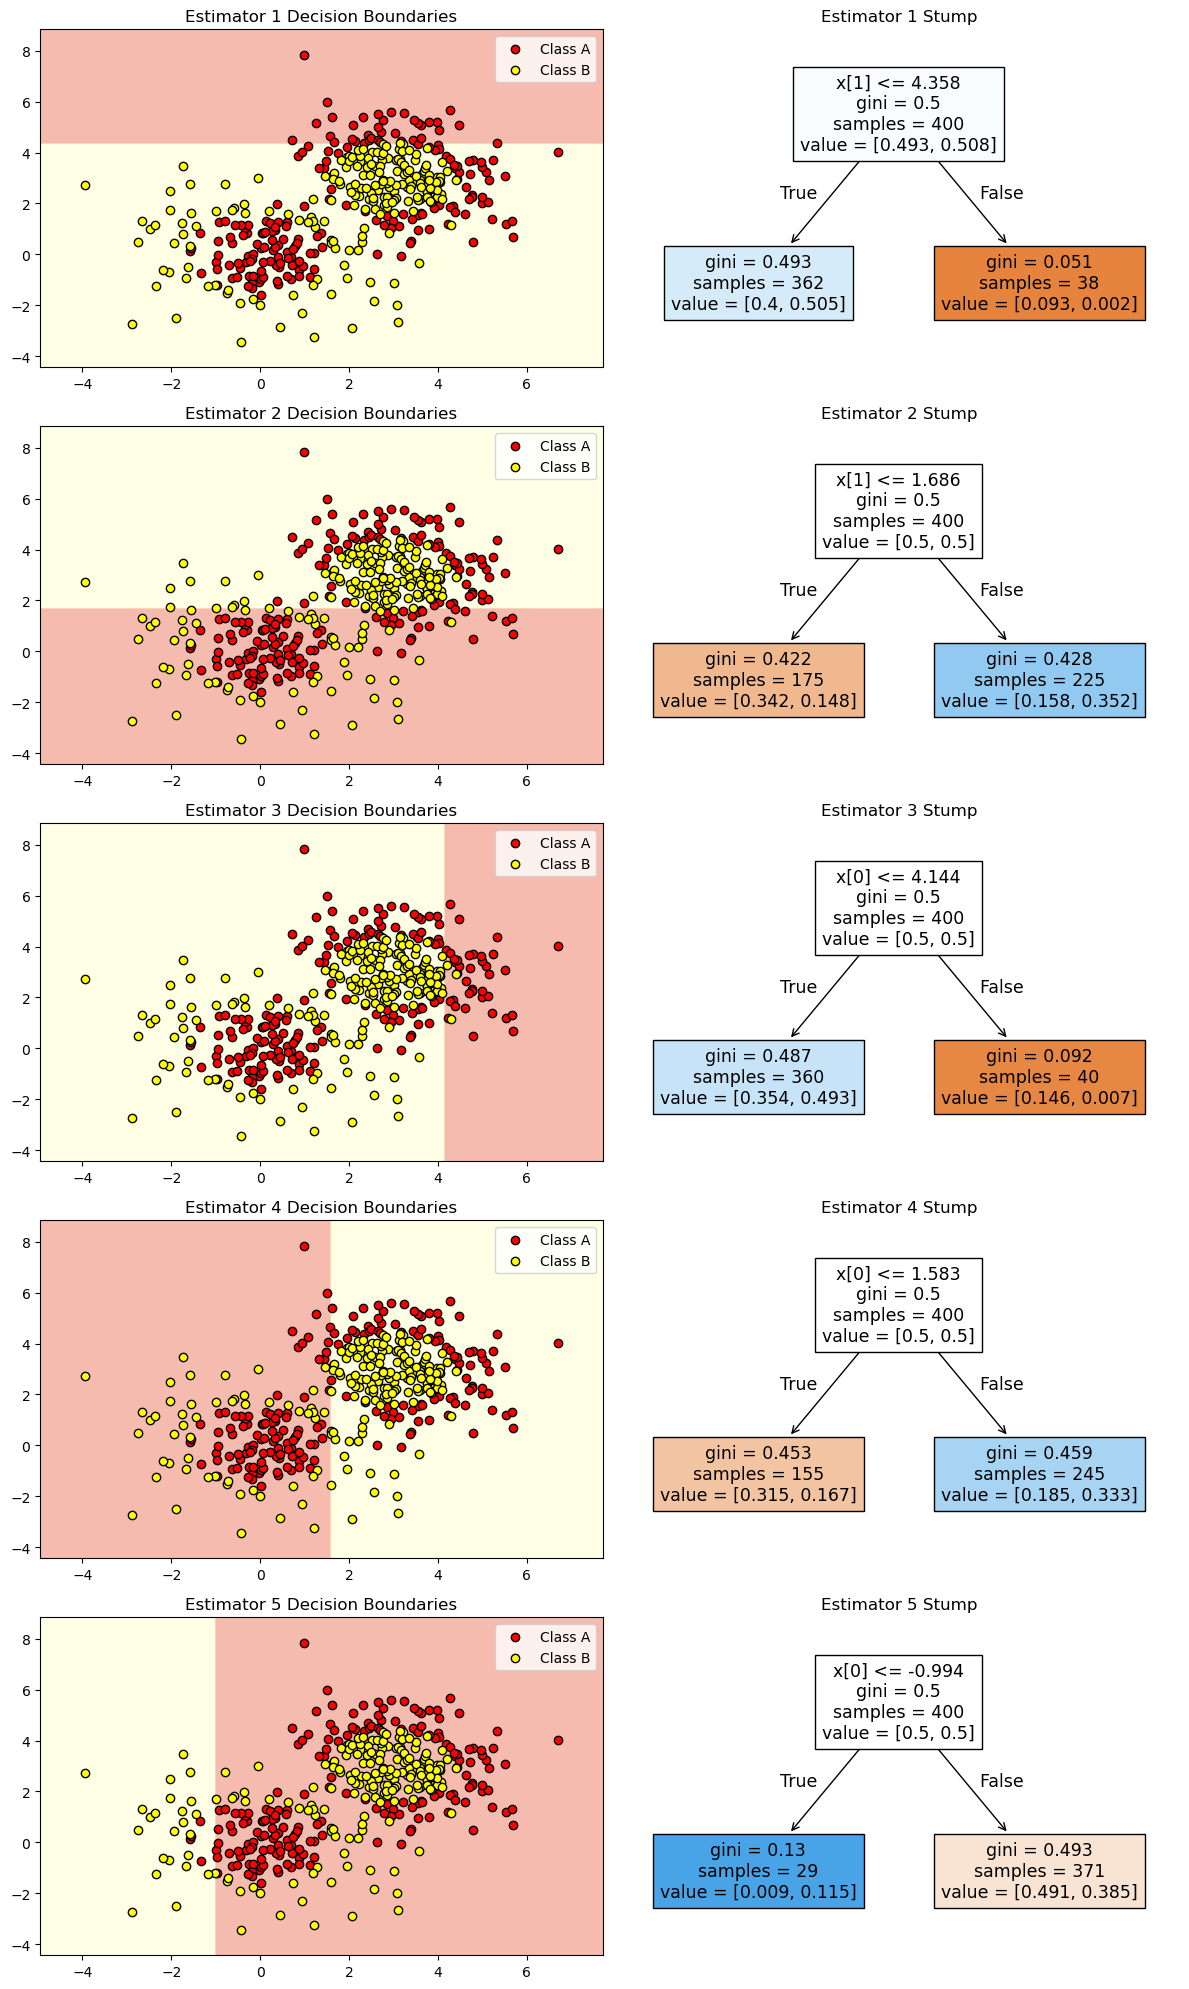

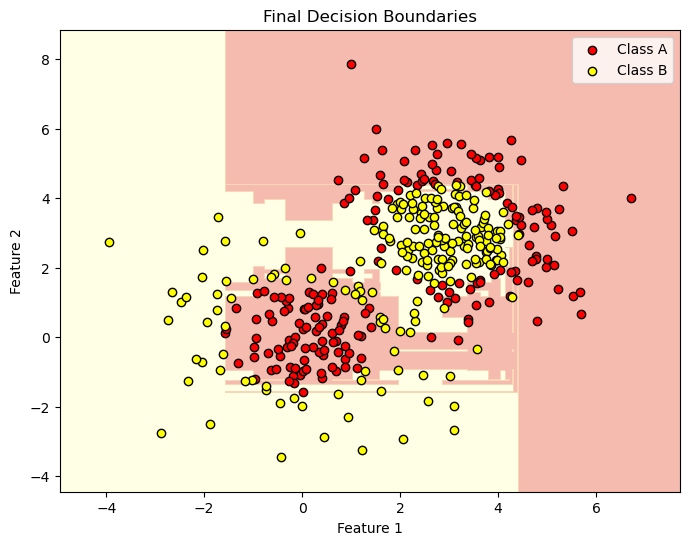

In [28]:
def plot_decision_boundaries_and_trees(X, y, n_estimators_to_plot):
  
    # Predefined colors for each class 
    colors = ['red', 'yellow']
    class_names = ['Class A', 'Class B']
    cmap = plt.cm.RdYlBu

    # Function to plot decision boundaries
    def plot_decision_boundary(clf, X, y, ax, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.4, levels=np.arange(-0.5, 3.5, 1), cmap=cmap)
        for i, color in enumerate(colors):
            idx = np.where(y == i)
            ax.scatter(X[idx, 0], X[idx, 1], c=color, label=class_names[i], edgecolor='k')
        ax.set_title(title)
        ax.legend(loc='upper right')

    # Plotting each estimator's decision boundary and decision tree
    fig, axes = plt.subplots(n_estimators_to_plot, 2, figsize=(12, n_estimators_to_plot*4))
    for i in range(n_estimators_to_plot):
        plot_decision_boundary(clf.estimators_[i], X, y, axes[i, 0], f"Estimator {i+1} Decision Boundaries")
        plot_tree(clf.estimators_[i], filled=True, ax=axes[i, 1])
        axes[i, 1].set_title(f"Estimator {i+1} Stump")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

    # Plotting the final decision boundary in a separate figure
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(clf, X, y, plt.gca(), "Final Decision Boundaries")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Plotting decision boundaries and trees
plot_decision_boundaries_and_trees(X_train, y_train, n_estimators_to_plot=5)

### Step 5: Performance Evaluation

In [25]:
# Calculate the accuracy score
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy score on the training set: {accuracy}")

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score on the test set: {accuracy}")

Accuracy score on the training set: 0.9225
Accuracy score on the test set: 0.83


<Figure size 800x600 with 0 Axes>

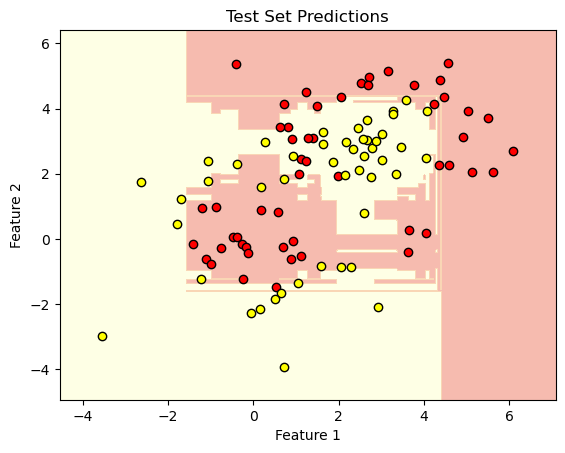

In [29]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colors = ['red', 'yellow']
    class_names = ['Class A', 'Class B']
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, levels=np.arange(-0.5, 3.5, 1), cmap=plt.cm.RdYlBu)
    for i, color in enumerate(colors):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label=class_names[i], edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(clf, X_test, y_test, "Test Set Predictions")